In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.integrate import simps

# Data Load

In [6]:
df = pd.read_csv('../data/data.csv')

In [7]:
df.head()

,date,precipitation,temperature,PET,spi_g3,spi_g6,spi_g12,spi_g24,spi_p3,spi_p6,...,spei_g24,spei_p3,spei_p6,spei_p12,spei_p24,pdsi,phdi,pmdi,scpdsi,zindex
0,1896-12-01,43.650390,10.250000,15.436143,-0.513807,0.497865,-0.152487,0.056428,-0.579120,0.449710,...,0.122127,-0.459720,0.345873,-0.438963,0.006990,-2.829379,-2.742514,-2.299250,-2.742514,0.962748
1,1897-01-01,44.330080,5.750000,4.602221,-0.584178,0.429545,-0.370692,0.096466,-0.745716,0.378167,...,0.178179,-0.601604,0.389101,-0.614058,0.060894,-2.567383,-2.489243,-2.027468,-2.489243,-0.087623
2,1897-02-01,4.200195,12.500000,23.140656,-0.680471,0.335547,-0.781599,-0.133654,-0.704154,0.254527,...,-0.084828,-0.614268,0.307477,-0.905177,-0.174819,-2.983024,-2.907807,-2.907807,-2.907807,-2.024869
3,1897-03-01,90.549805,16.950195,52.992420,-0.107730,-0.513281,-0.476656,0.109161,-0.138778,-0.556821,...,0.079721,-0.222051,-0.494931,-0.746047,0.010565,-2.210590,-2.028139,-1.248526,-2.028139,1.740493
4,1897-04-01,60.980470,19.049805,71.035450,-0.244276,-0.693784,-0.742530,0.086133,-0.278683,-0.734773,...,0.065095,-0.420828,-0.681043,-0.931860,0.006835,-2.189406,-2.024192,-1.453848,-2.024192,-0.614854


# Step 1 Drought Event Extraction

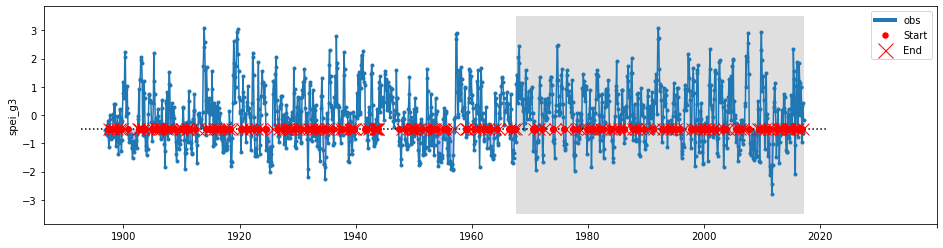

In [8]:
# Choose Drought Index Time Series
title = 'spei_g3'
y = df[title]
t = np.arange(len(y))

# Define Truncation Level
trunc = -0.5

plt.figure(figsize=[16,4])
plt.fill(np.concatenate([[849,len(y)], [len(y),849]]),
         np.concatenate([[-3.5,-3.5],[3.5,3.5]]),
         alpha=.25, fc='gray', ec='None')
plt.plot(t,y,marker='.')
plt.plot([-50,len(y)+50],[trunc,trunc],'k:')
plt.ylabel(title)
custom_elems = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], marker='.', color='w', markerfacecolor='r', markersize=15),
                Line2D([0], [0], marker='x', color='w', markeredgecolor='r', markersize=15)]
plt.legend(custom_elems,['obs','Start','End'])

duration = []
severity = []
starts = []
ends = []
on = False
for j in range(len(y)-1):
    if (not on) and (y[j] >= trunc) and (y[j+1] < trunc):
        on = True
        start_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        start_index = j+1
        starts.append(j+1)
        #plot
        plt.plot([start_time],[trunc],'r.',markersize=12)
    elif (on) & (y[j] < trunc) and (y[j+1] >= trunc):
        on = False
        end_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        end_index = j+1
        ends.append(j+1)
        drought_time = np.insert(np.array(np.double(t[start_index:end_index])),0,start_time)
        drought_time = np.insert(drought_time,len(drought_time),end_time)
        drought_intensity = np.insert(np.array(y[start_index:end_index]),0,trunc)
        drought_intensity = np.insert(drought_intensity,len(drought_intensity),trunc)
        duration.append(end_time - start_time)
        severity.append(simps(trunc - drought_intensity,drought_time))
        
        #plot
        plt.plot([end_time],[trunc],'rx', markersize=12)
        plt.fill(np.concatenate([drought_time, np.flip(drought_time)]),
                 np.concatenate([drought_intensity,np.full_like(drought_intensity,trunc)]),
                 alpha=.25, fc='b', ec='None')
plt.xticks([37,37+240,37+240*2,37+240*3,37+240*4,37+240*5,37+240*6,37+240*7],
           [1900,1920,1940,1960,1980,2000,2020])
plt.show()
interval = np.array(starts[1:]) - np.array(ends[0:142])

In [9]:
print('Duration(',len(duration),'):',duration)
print('Severity(',len(severity),'):',severity)
print('Interval(',len(interval),'):',interval)

Duration( 143 ): [2.6400785751883777, 4.702406953137912, 2.864216093451205, 3.4679025722626484, 2.233578275239495, 19.801360495713794, 0.07887110606640135, 0.6826169507436077, 6.344860164676859, 1.6216135850034021, 1.4076585052253279, 0.1820584522306632, 2.2747128269099903, 6.0240770442733265, 2.0156460270653156, 0.6935814143469656, 12.755990829567565, 2.31121531700083, 5.399363757456513, 0.9380514675135032, 1.1639369849213494, 5.351493403585351, 5.589876686466852, 0.2487603155468605, 0.013749657314349406, 1.1008740961481749, 1.8109238607089253, 1.2508720273254141, 7.102878604793375, 9.7599675111706, 4.37330352221403, 1.9628543566659005, 1.5970010552108533, 2.3424154525958443, 6.292042708357542, 2.7130015675658683, 13.917119525750934, 2.6262274815645696, 1.1534158185949082, 0.9883918394585862, 1.016014724264835, 2.6819022000947257, 2.8796369204752637, 0.7382235355445346, 1.7031175099369875, 3.5899925248713203, 1.9004364654771848, 1.276192305438883, 3.732949096744676, 3.991768082865349,

In [10]:
np.mean(interval)

6.591549295774648

# Step 2 Partioning into Train and Test Set

In [12]:
Q = 90
d_train = np.array(duration)[:Q]
d_test = np.array(duration)[Q:]
s_train = np.array(severity)[:Q]
s_test = np.array(severity)[Q:]

df_alldata = pd.DataFrame({'duration': duration,'severity': severity})
df_train = pd.DataFrame({'duration':d_train,'severity':s_train})
df_test = pd.DataFrame({'duration':d_test,'severity':s_test})
df_alldata.to_csv('../data/alldata.csv',index=False)
df_train.to_csv('../data/train.csv',index=False)
df_test.to_csv('../data/test.csv',index=False)

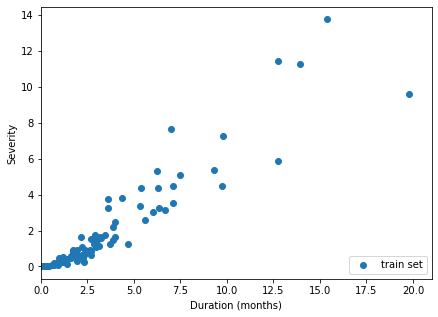

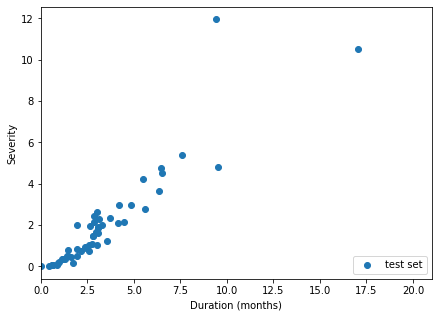

In [13]:
plt.figure(figsize=[7,5])
plt.scatter(d_train,s_train,label='train set')
plt.xlabel('Duration (months)')
plt.ylabel('Severity')
plt.xlim([0,21])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=[7,5])
plt.scatter(d_test,s_test,label='test set')
plt.xlabel('Duration (months)')
plt.ylabel('Severity')
plt.xlim([0,21])
plt.legend(loc='lower right')
plt.show()